## Reproduce Supp. Fig. 10b,c,d left-hand column (test set)
Test set. Plot the transfer results for the test set from variant effect prediciton (Fowler,2018), Stability Deep Mutational Scanning on Natural and de novo designs (Rocklin, 2017) and extrapolation from Stability Deep Mutational Scanning on Natural and de novo designs (Rocklin, 2017) (Methods).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import random
import os
import pickle
from sklearn.externals import joblib
# To allow imports from common directory
sys.path.append('../../')
from common.plot_style_utils import set_pub_plot_context, rep_names, main_text_rep_names, save_for_pub, label_point

%matplotlib inline
random.seed(42)
np.random.seed(42)

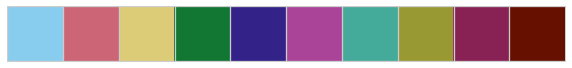

In [2]:
set_pub_plot_context()
sns.palplot(sns.color_palette())

In [3]:
with open("../../data/transfer_all_rep_results_test.pkl", "rb") as p:
    scores = joblib.load(p)
display(scores.keys())

dict_keys(['fowler_consistent_single_UBI', 'rocklin_ssm2', 'rocklin_ssm2_nat_eng'])

In [4]:
scores['fowler_consistent_single_UBI']

,transfer_ratio_avg,indomain_ratio_avg,perf_ratio_avg
simple_freq_and_len,1.123080,0.877883,1.279305
tfidf_2grams,1.189342,0.715071,1.663250
arnold_uniform_4_1,1.065235,0.932675,1.142129
final_cell,1.080968,0.579386,1.865715
64_final_cell,1.163432,0.845322,1.376318
3grams,1.091428,0.779055,1.400964
tfidf_3grams,1.043703,0.713350,1.463100
256_avg_hidden,1.036799,0.606932,1.708263
all_64,1.080442,0.712424,1.516571
256_final_cell,1.058106,0.667107,1.586113


In [5]:
scores['fowler_consistent_single_UBI'].sort_values(by='transfer_ratio_avg')

,transfer_ratio_avg,indomain_ratio_avg,perf_ratio_avg
all_256,1.034448,0.592266,1.746594
64_avg_hidden,1.034587,0.744764,1.389147
256_avg_hidden,1.036799,0.606932,1.708263
tfidf_3grams,1.043703,0.713350,1.463100
RGN_avg_hidden,1.051445,0.529875,1.984327
256_final_cell,1.058106,0.667107,1.586113
final_hidden,1.064739,0.690290,1.542453
arnold_uniform_4_1,1.065235,0.932675,1.142129
RGN,1.069327,0.834647,1.281173
arnold_random_3_7,1.077933,0.929903,1.159189


In [6]:
fowler = scores['fowler_consistent_single_UBI'].loc[
    ['avg_hidden', 'RGN_avg_hidden', 'RGN','arnold_uniform_4_1',"tfidf_3grams"], :
]
fowler

,transfer_ratio_avg,indomain_ratio_avg,perf_ratio_avg
avg_hidden,1.082856,0.454728,2.381328
RGN_avg_hidden,1.051445,0.529875,1.984327
RGN,1.069327,0.834647,1.281173
arnold_uniform_4_1,1.065235,0.932675,1.142129
tfidf_3grams,1.043703,0.713350,1.463100


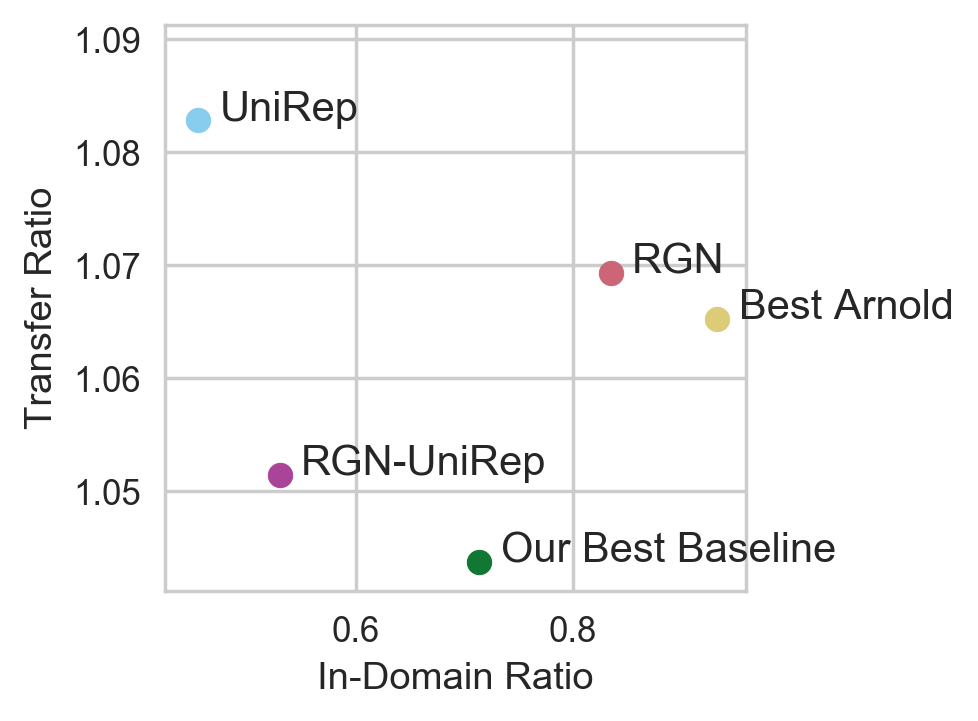

In [7]:
set_pub_plot_context(context="notebook")
fig = plt.figure(figsize=(3,3), dpi=250)
ax = fig.add_subplot(111,
                    xlabel="In-Domain Ratio",
                    ylabel="Transfer Ratio")
palette = sns.color_palette()
color_idxs = [0,5,1,2,3]
colors = [palette[i] for i in color_idxs]
names = [main_text_rep_names[o] for o in fowler.index.values.tolist()]
names[3] = "Best Arnold"
names[4] = "Our Best Baseline"
for i, (_, row) in enumerate(fowler.iterrows()):
    ax.scatter(x=row['indomain_ratio_avg'], 
                y=row['transfer_ratio_avg'], 
                c=colors[i])

    
label_point(pd.Series(fowler.indomain_ratio_avg.values),
            pd.Series(fowler.transfer_ratio_avg.values),
            pd.Series(
                names
            ),ax, fontsize=12)
save_for_pub(fig, path="./img/b_test", dpi=250)

In [8]:
scores['rocklin_ssm2'].sort_values(by="transfer_ratio_avg")

,transfer_ratio_avg,indomain_ratio_avg,perf_ratio_avg
RGN_final_cell,2.502548,0.566751,4.415606
final_cell,2.542757,0.556871,4.566148
all_1900,2.640831,0.704246,3.749870
RGN_avg_hidden,2.774744,0.777994,3.566539
64_final_hidden,2.791747,0.952814,2.930001
avg_hidden,2.881651,0.561252,5.134329
all_final_cell,2.913307,0.532933,5.466557
all_64,2.914549,0.778075,3.745844
all_avg_hidden,2.945020,0.540739,5.446289
final_hidden,3.675052,0.653789,5.621156


In [9]:
ssm2 = scores['rocklin_ssm2'].loc[
    ['avg_hidden', 'RGN_avg_hidden', 'RGN','arnold_original_3_7',"simple_freq_and_len"], :
]
ssm2

,transfer_ratio_avg,indomain_ratio_avg,perf_ratio_avg
avg_hidden,2.881651,0.561252,5.134329
RGN_avg_hidden,2.774744,0.777994,3.566539
RGN,4.763518,0.659611,7.221713
arnold_original_3_7,4.125770,1.007007,4.097064
simple_freq_and_len,4.121739,1.000000,4.121739


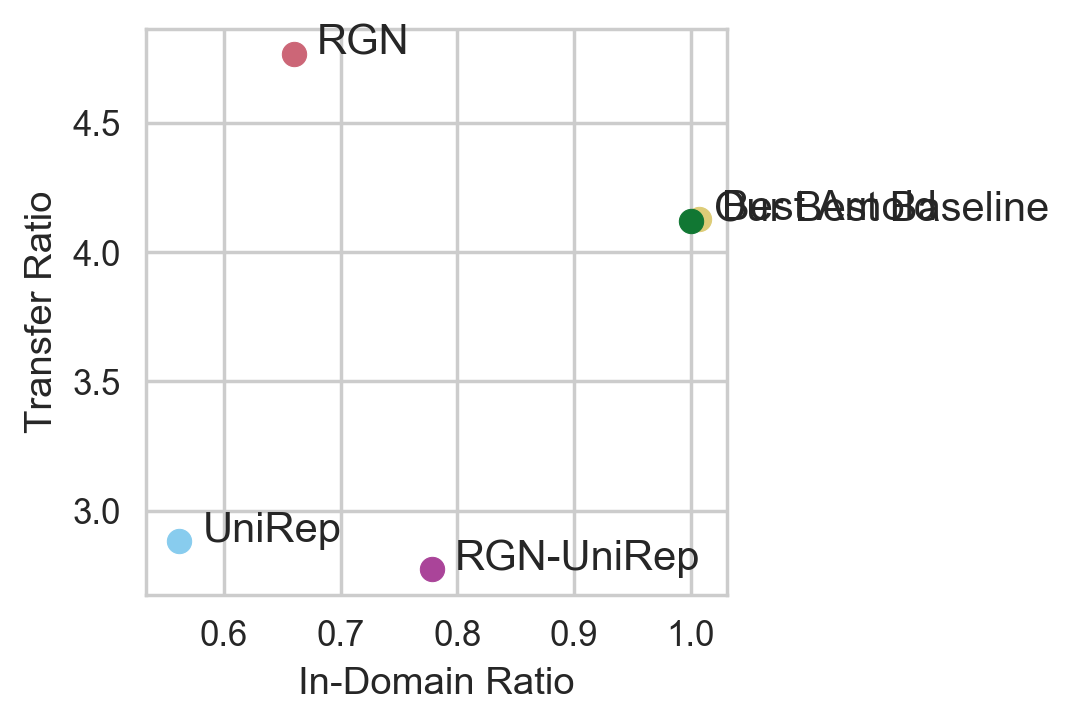

In [10]:
set_pub_plot_context(context="notebook")
fig = plt.figure(figsize=(3,3), dpi=250)
ax = fig.add_subplot(111,
                    xlabel="In-Domain Ratio",
                    ylabel="Transfer Ratio")
palette = sns.color_palette()
color_idxs = [0,5,1,2,3]
colors = [palette[i] for i in color_idxs]
names = [main_text_rep_names[o] for o in ssm2.index.values.tolist()]
names[3] = "Best Arnold"
names[4] = "Our Best Baseline"
for i, (_, row) in enumerate(ssm2.iterrows()):
    ax.scatter(x=row['indomain_ratio_avg'], 
                y=row['transfer_ratio_avg'], 
                c=colors[i])

    
label_point(pd.Series(ssm2.indomain_ratio_avg.values),
            pd.Series(ssm2.transfer_ratio_avg.values),
            pd.Series(
                names
            ),ax, fontsize=12)
save_for_pub(fig, path="./img/c_test", dpi=250)

In [11]:
extrap_df = pd.read_csv("../../data/for_figure_rocklin_ssm2_to_remote_transfer_results_test.csv", index_col=0)
extrap_df

,transfer_ratio_avg,indomain_ratio_avg,perf_ratio_avg
mean,4.953539,4.940756,1.002587
simple_freq_plus,4.953539,0.962084,5.148762
simple_freq_and_len,3.058639,1.000000,3.058639
tfidf_3grams,4.190260,1.052016,3.983076
3grams,3.913042,1.033667,3.785594
tfidf_2grams,5.257597,0.883269,5.952430
2grams,5.881951,0.868847,6.769835
RGN,4.080907,0.668448,6.105047
64_avg_hidden,4.953539,0.841111,5.889281
64_final_hidden,5.992953,0.980833,6.110067


In [12]:
extrap_df.sort_values(by='transfer_ratio_avg')

,transfer_ratio_avg,indomain_ratio_avg,perf_ratio_avg
avg_hidden,1.688447,0.520939,3.241165
simple_freq_and_len,3.058639,1.000000,3.058639
all_1900,3.144485,0.559648,5.618681
final_hidden,3.234937,0.637364,5.075490
64_final_cell,3.779127,0.931279,4.057997
3grams,3.913042,1.033667,3.785594
RGN,4.080907,0.668448,6.105047
tfidf_3grams,4.190260,1.052016,3.983076
RGN_final_cell,4.226008,0.589817,7.164943
arnold_random_3_7,4.378065,1.261207,3.471329


In [13]:
ssm2_extrap = extrap_df.loc[
    ['avg_hidden', 'RGN_avg_hidden', 'RGN','arnold_random_3_7',"simple_freq_and_len"], :
]
ssm2_extrap

,transfer_ratio_avg,indomain_ratio_avg,perf_ratio_avg
avg_hidden,1.688447,0.520939,3.241165
RGN_avg_hidden,4.720623,0.552334,8.546681
RGN,4.080907,0.668448,6.105047
arnold_random_3_7,4.378065,1.261207,3.471329
simple_freq_and_len,3.058639,1.000000,3.058639


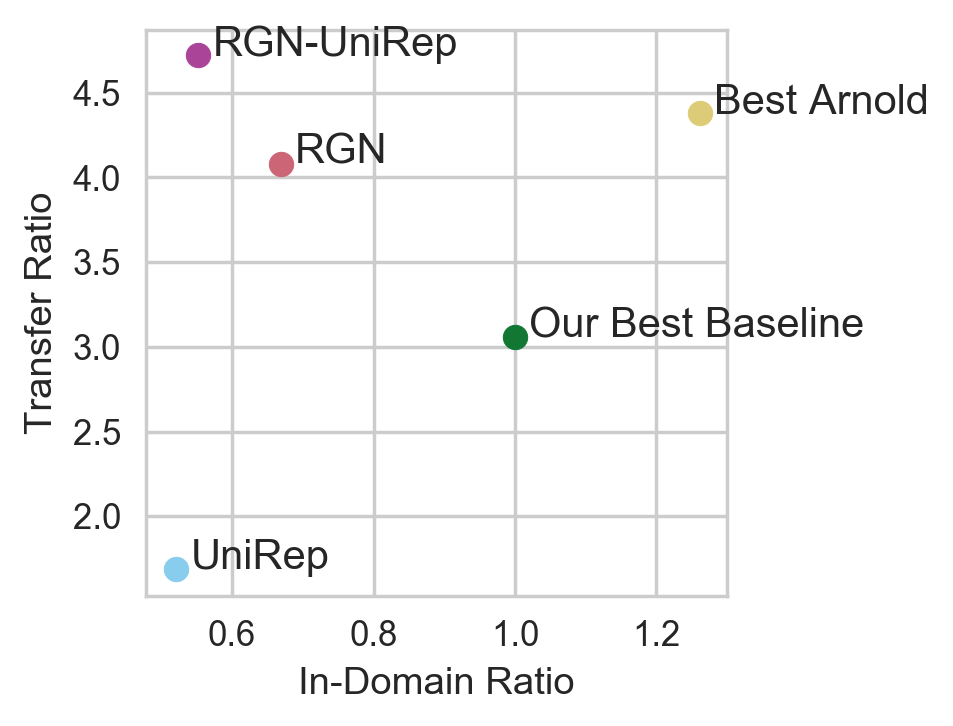

In [14]:
set_pub_plot_context(context="notebook")
fig = plt.figure(figsize=(3,3), dpi=250)
ax = fig.add_subplot(111,
                    xlabel="In-Domain Ratio",
                    ylabel="Transfer Ratio")
palette = sns.color_palette()
color_idxs = [0,5,1,2,3]
colors = [palette[i] for i in color_idxs]
names = [main_text_rep_names[o] for o in ssm2.index.values.tolist()]
names[3] = "Best Arnold"
names[4] = "Our Best Baseline"
for i, (_, row) in enumerate(ssm2_extrap.iterrows()):
    ax.scatter(x=row['indomain_ratio_avg'], 
                y=row['transfer_ratio_avg'], 
                c=colors[i])
    
label_point(pd.Series(ssm2_extrap.indomain_ratio_avg.values),
            pd.Series(ssm2_extrap.transfer_ratio_avg.values),
            pd.Series(
                names
            ),ax, fontsize=12)
save_for_pub(fig, path="./img/d_test", dpi=250)